# Analyze metadata provided

In [1]:
import pandas as pd

In [19]:
df_meta = pd.read_csv(r"C:\Users\Fischer\01_TensorFlow_GreatBarrier\train.csv")
df_meta

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]
...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[]
23497,2,29859,10756,2984,2-10756,[]
23498,2,29859,10757,2985,2-10757,[]
23499,2,29859,10758,2986,2-10758,[]


In [20]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        23501 non-null  int64 
 1   sequence        23501 non-null  int64 
 2   video_frame     23501 non-null  int64 
 3   sequence_frame  23501 non-null  int64 
 4   image_id        23501 non-null  object
 5   annotations     23501 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [7]:
import matplotlib.pyplot as plt

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

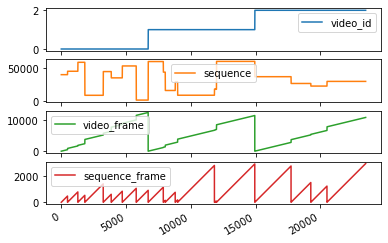

In [21]:
#show some info about the sequence, sequence lengths, etc.
df_meta.plot(subplots=True)

In [22]:
print(f"there are in total {len(df_meta.sequence.unique())} sequences")
df_meta.sequence.unique()

there are in total 20 sequences


array([40258, 45518, 59337,  8399, 45015, 35305, 53708,   996, 60510,
       44160, 15827, 29424,  8503, 18048, 17665, 60754, 37114, 26651,
       22643, 29859], dtype=int64)

### Get the quantity of annotations
The annotations per frame is stored to the dataframe for further analysis and in a separate variable as well.

In [34]:
import ast

#Create a list of empty annotations. It will contain in each position a list with the annotations
annotations=[]

#parse annotations into a list
for string in df_meta["annotations"]:
    annotation=ast.literal_eval(string)
    annotations.append(annotation)

In [38]:
#Store the annotations into the dataframe
i = 0
df_meta["annotations"]=0
while i < len(annotations):
    df_meta.loc[i,"annotations"]=len(annotations[i])
    i = i +1

In [39]:
df_meta

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,stars
0,0,40258,0,0,0-0,0,2
1,0,40258,1,1,0-1,0,2
2,0,40258,2,2,0-2,0,2
3,0,40258,3,3,0-3,0,2
4,0,40258,4,4,0-4,0,2
...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,0,2
23497,2,29859,10756,2984,2-10756,0,2
23498,2,29859,10757,2985,2-10757,0,2
23499,2,29859,10758,2986,2-10758,0,2


### Checking if the stars "trace" a sort of line in the image
For a given sequence, I want to explore if a star "traces" a sort of line if multiple sequences are inspected. Maybe this can be useful afterwards to analyze the images.

In [45]:
#pick any sequence and filter data
seq = 45518

mask_seq = df_meta["sequence"]==seq
df_seq = df_meta.loc[mask_seq,:]
df_seq

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,stars
480,0,45518,873,0,0-873,0,2
481,0,45518,874,1,0-874,0,2
482,0,45518,875,2,0-875,0,2
483,0,45518,876,3,0-876,0,2
484,0,45518,877,4,0-877,0,2
...,...,...,...,...,...,...,...
1273,0,45518,1666,793,0-1666,0,2
1274,0,45518,1667,794,0-1667,0,2
1275,0,45518,1668,795,0-1668,0,2
1276,0,45518,1669,796,0-1669,0,2


In [48]:
#get range of indexes
min_index = min(df_seq.index)
max_index = max(df_seq.index)

#iterate the list of annotations and get x,y coordinates of the stars
index = min_index
x_coord = []
y_coord = []

while index <= max_index:
    for annotation in annotations[index]:
        x_coord.append(annotation["x"])
        y_coord.append(annotation["y"])
    
    index = index +1

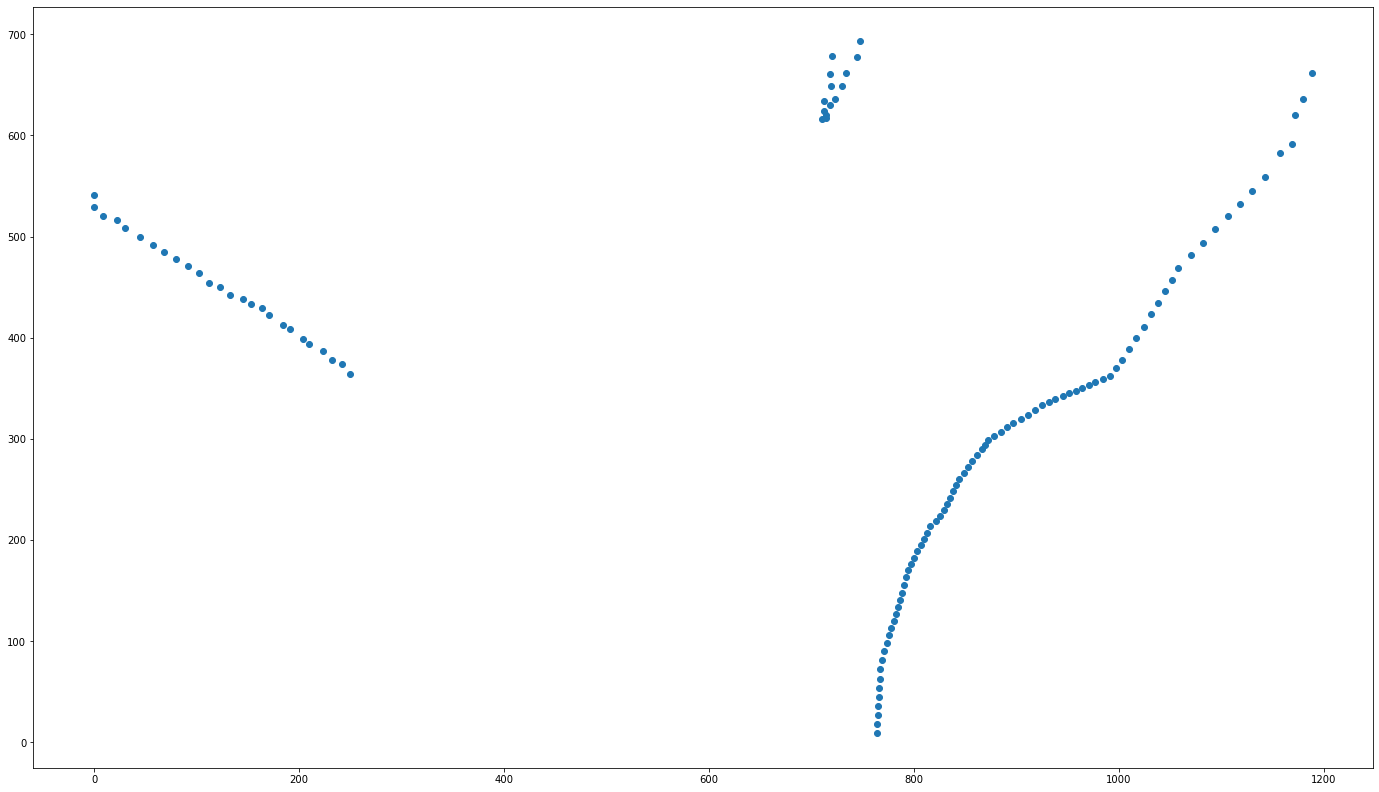

In [57]:
# Import matplotlib and plot the data
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib as mpl
import matplotlib.pyplot as plt

#Create artist
fig = Figure(figsize=(24,14))
canvas = FigureCanvas(fig)

#Add just one subplot
fig1 = fig.add_subplot(1,1,1)
fig1.scatter(x_coord,y_coord)

#Show result
fig

#### Now for all
Do the same, but now plot all sequences

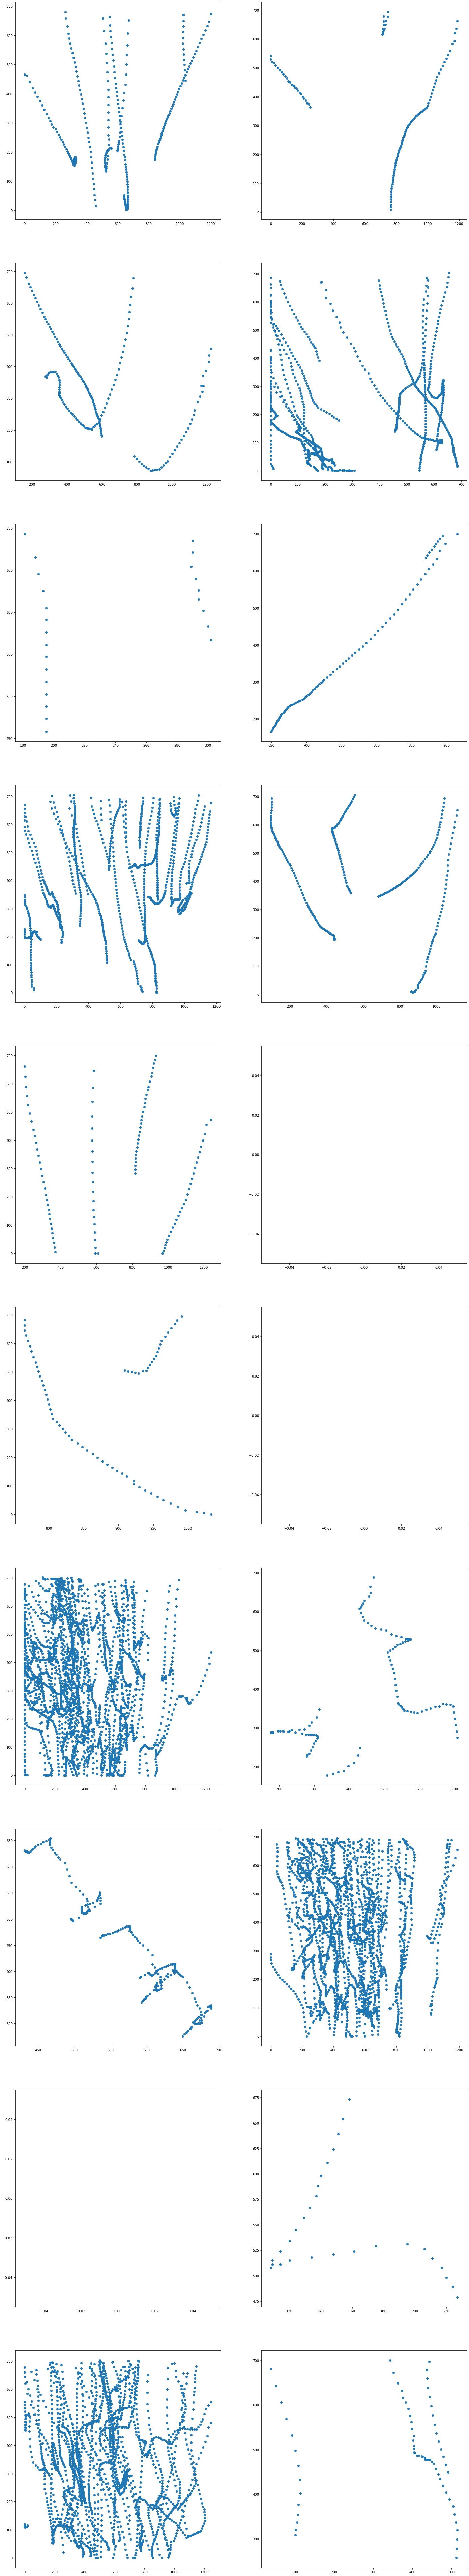

In [62]:
#Create a new figure
#Create artist
fig_full = Figure(figsize=(24,140))
canvas = FigureCanvas(fig_full)

#create an empty list of figures
figures = {}

position = 1

for seq in df_meta.sequence.unique():
    x_coord,y_coord = get_XY(df_meta,seq)
    
    figures[seq] = fig_full.add_subplot(10,2,position)
    figures[seq].scatter(x_coord,y_coord)
    
    position = position +1
    
fig_full
    

In [58]:
def get_XY(df_meta,seq):
    #mask and filter
    mask_seq = df_meta["sequence"]==seq
    df_seq = df_meta.loc[mask_seq,:]
    
    #get range of indexes
    min_index = min(df_seq.index)
    max_index = max(df_seq.index)

    #iterate the list of annotations and get x,y coordinates of the stars
    index = min_index
    x_coord = []
    y_coord = []

    while index <= max_index:
        for annotation in annotations[index]:
            x_coord.append(annotation["x"])
            y_coord.append(annotation["y"])

        index = index +1
        
    return(x_coord,y_coord)